In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import requests
from io import StringIO
from datetime import timedelta, datetime
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter
import matplotlib.font_manager as fm
from functions_visualization import *
font_path = "font-folder/Roboto-Regular.ttf"
font_path_bold = "font-folder/Roboto-Bold.ttf"
font_prop = fm.FontProperties(fname=font_path, size=20)
font_prop_legend = fm.FontProperties(fname=font_path, size=16)
font_prop_title = fm.FontProperties(fname=font_path_bold, size=22)
import matplotlib as mpl
mpl.rcParams['font.family'] = font_prop.get_name()
import warnings
warnings.filterwarnings('ignore')


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df_wis = pd.read_csv("../output_data/performance_adaptive_ensemble/wis_performance.csv")
df_mae = pd.read_csv("../output_data/performance_adaptive_ensemble/mae_performance.csv")
df_wis_rmse = pd.read_csv("../output_data/performance_adaptive_ensemble/wis_performance_rmse.csv")
df_mae_rmse = pd.read_csv("../output_data/performance_adaptive_ensemble/mae_performance_rmse.csv")
df_surv = pd.read_csv("../../../input_data/target-hospital-admissions_2024-04-27.csv")

In [3]:
df_wis.head()

,k_perc,week,wis_adaptive_ensemble2,wis_original_ensemble2,wis_original_ensembleA,wis_original_ensembleB,wis_original_ensembleC,wis_original_ensembleD,wis_original_ensembleE,wis_original_ensembleF,wis_rel_original2,wis_rel_originalA,wis_rel_originalB,wis_rel_originalC,wis_rel_originalD,wis_rel_originalE,wis_rel_originalF
0,5,2023-11-04,2722.571866,2347.767057,2342.283850,2472.135425,2627.274914,2306.011821,2970.760278,2320.370099,1.159643,1.162358,1.101304,1.036272,1.180641,0.916456,1.173335
1,5,2023-11-11,2483.859904,2414.566041,2403.939050,2550.165960,2697.268839,2377.269128,3054.379301,2389.601860,1.028698,1.033246,0.973999,0.920880,1.044837,0.813213,1.039445
2,5,2023-11-18,2410.386934,2476.620471,2458.530162,2628.537950,2758.844688,2447.770048,3129.129377,2456.687555,0.973256,0.980418,0.917007,0.873694,0.984728,0.770306,0.981153
3,5,2023-11-25,2410.167259,2526.060578,2495.965962,2702.846574,2800.321079,2512.789301,3182.731758,2516.450200,0.954121,0.965625,0.891714,0.860675,0.959160,0.757264,0.957765
4,5,2023-12-02,2426.231530,2556.465157,2507.818762,2769.446675,2811.304014,2567.299567,3203.436446,2563.063723,0.949057,0.967467,0.876071,0.863027,0.945052,0.757384,0.946614


Data format for plotting boxplots of different k values

In [4]:
# -------- WIS --------
df_melted_wis = df_wis.melt(id_vars=['k_perc', 'week'], value_vars=['wis_rel_original2'], 
                    var_name='metric', value_name='value')
df_melted_wis['k_perc'] = df_melted_wis['k_perc'].astype(str)
means_wis = df_melted_wis.groupby('k_perc')['value'].mean()
# -------- MAE --------
df_melted_mae = df_mae.melt(id_vars=['k_perc', 'week'], value_vars=['mae_rel_original2'],
                    var_name='metric', value_name='value')
df_melted_mae['k_perc'] = df_melted_mae['k_perc'].astype(str)
means_mae = df_melted_mae.groupby('k_perc')['value'].mean()

Data format for plotting metrics in time (for k = 15,25,50 and separately in supplementary k=5,75)

In [5]:
df_surv.rename(columns={"date": "week"}, inplace=True)
df_wis_k_5, df_wis_k_15, df_wis_k_25, df_wis_k_50, df_wis_k_75 = get_wis_dataframes(df_wis, df_surv)
df_mae_k_5, df_mae_k_15, df_mae_k_25, df_mae_k_50, df_mae_k_75 = get_mae_dataframes(df_mae, df_surv)

Define colors palette and references

In [6]:
# Palette
palette = {
    '5': '#1d4f60',
    '15': '#2d7974',
    '25': '#4da284',
    '50': '#80c799',
    '75': '#c4e6c3'
}
color_swarm = '#103a43'
color_hosp = 'grey'
y_lim = [0.3, 2.1]

Visualization

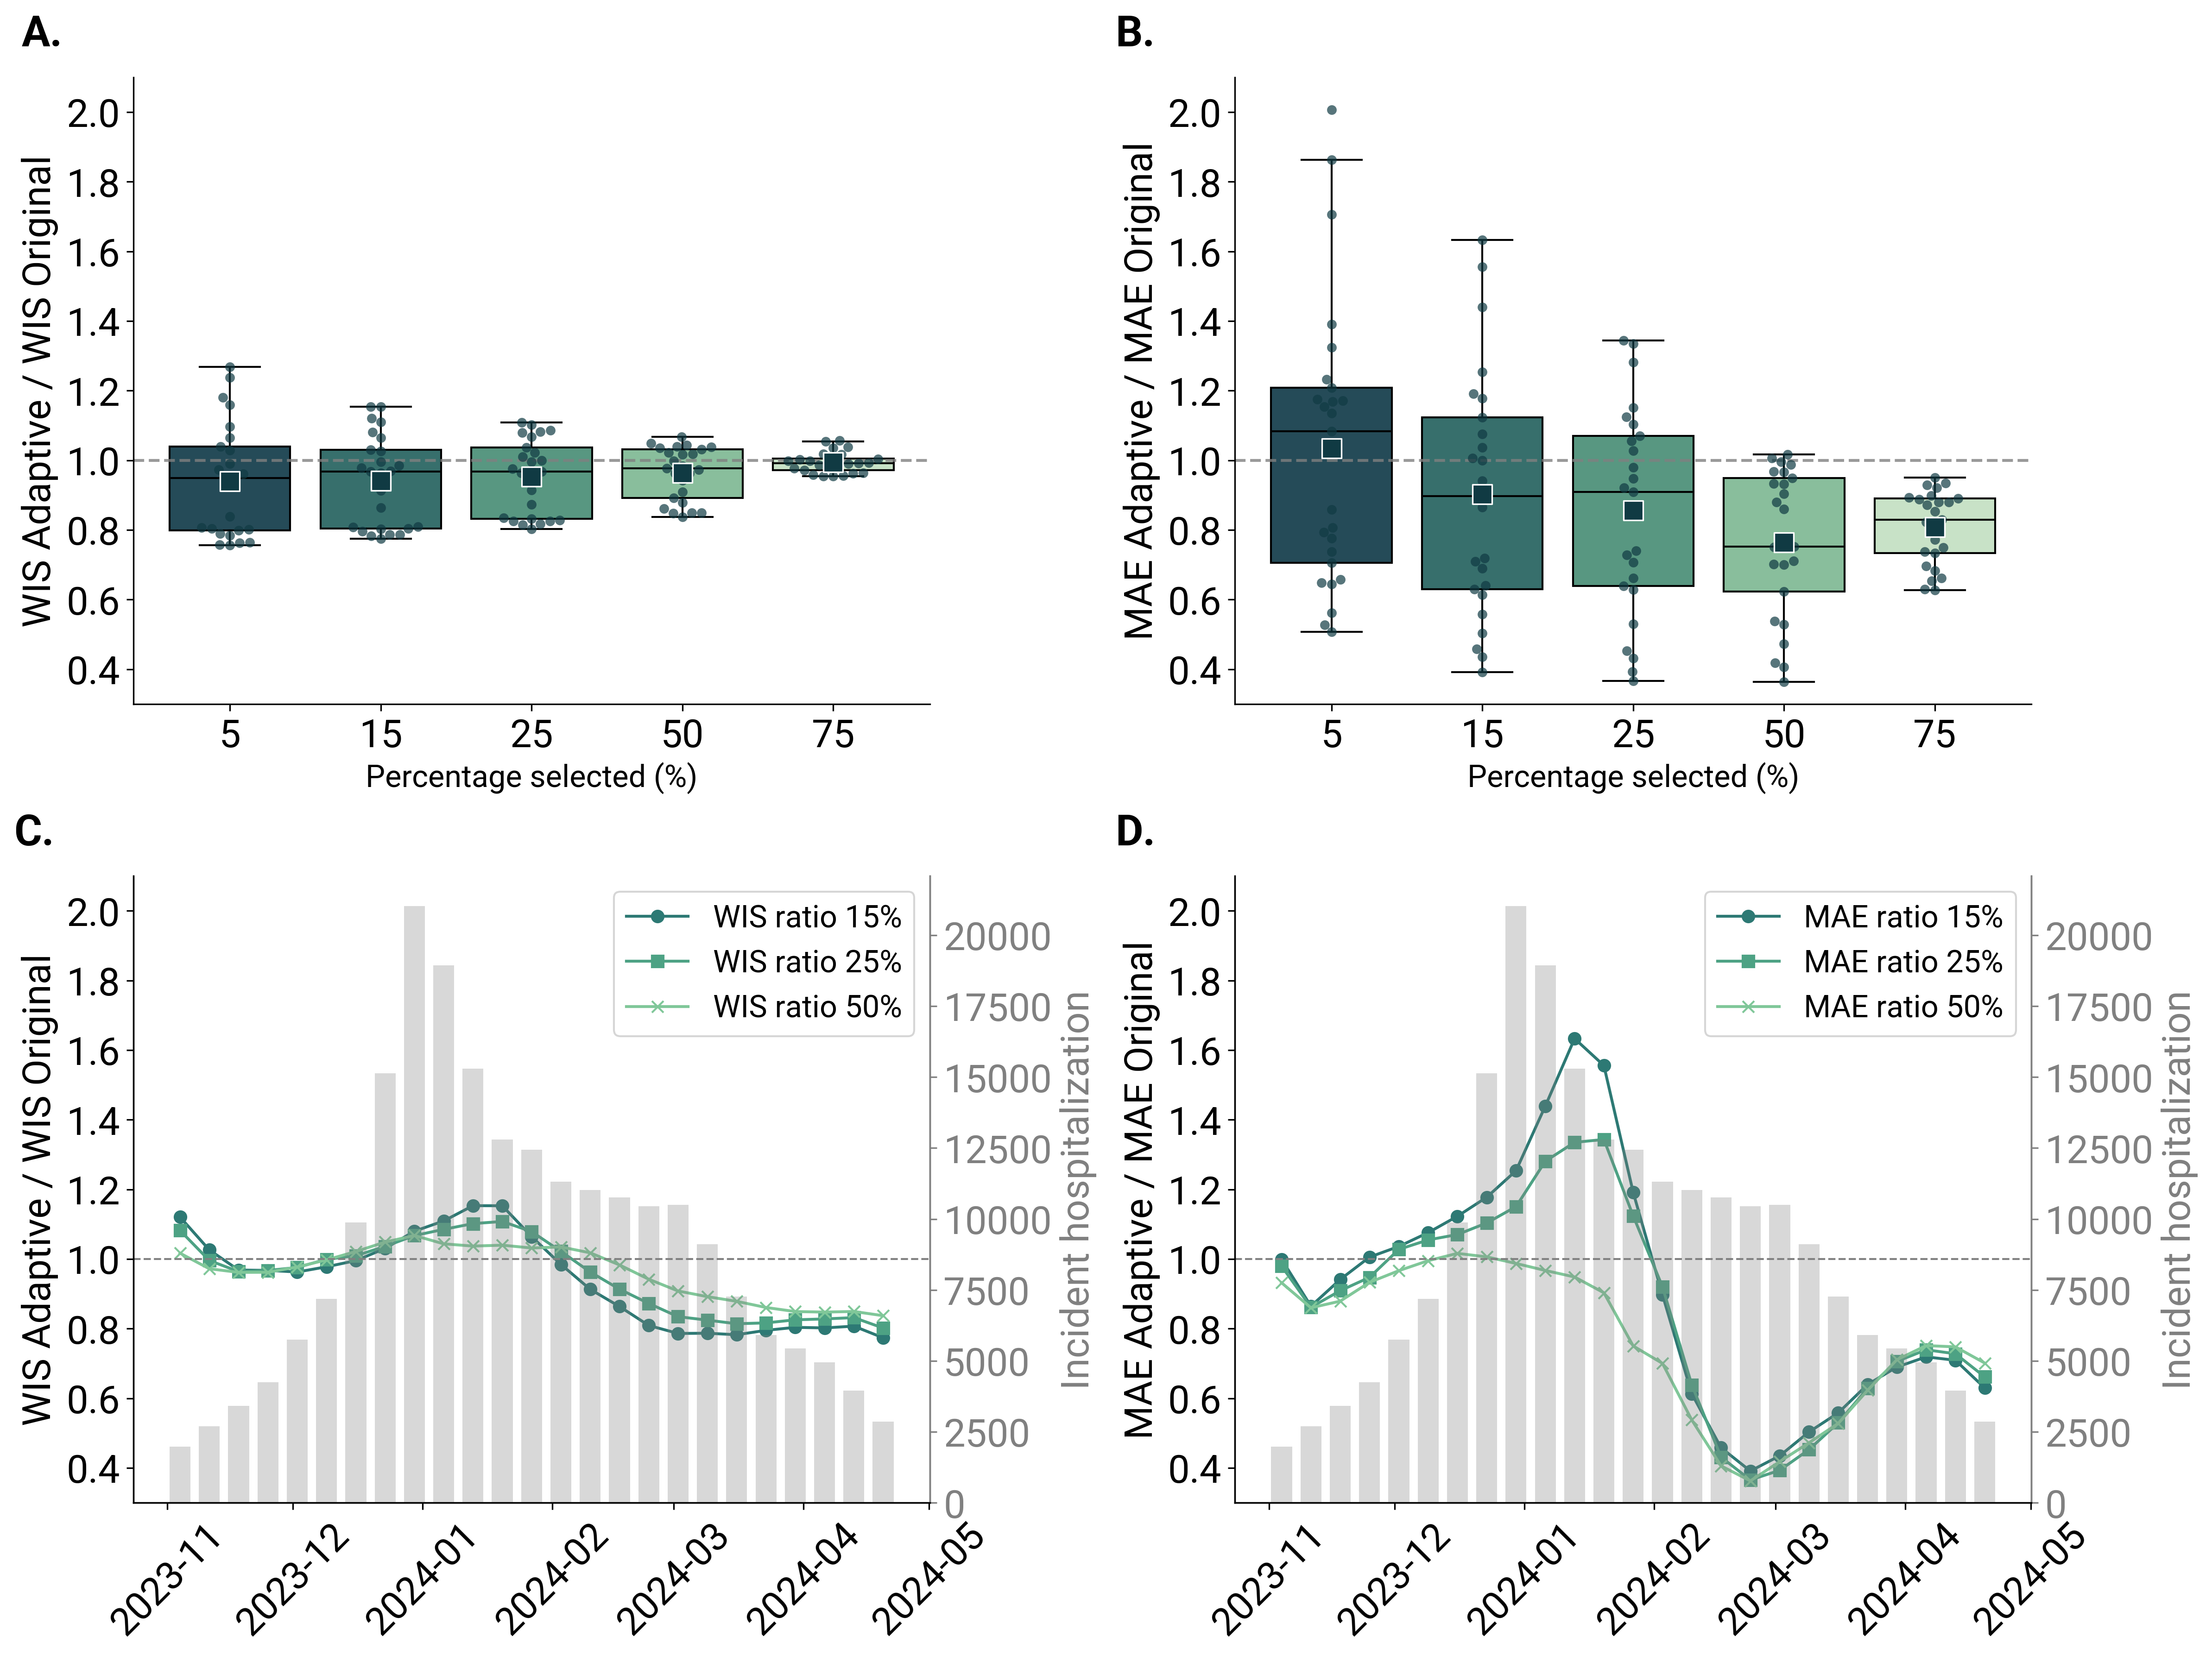

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12), dpi=300)

# --- FIRST SUBPLOT (A): WIS ---
ax1 = axes[0, 0]
sns.boxplot(data=df_melted_wis, x='k_perc', y='value', ax=ax1, palette=palette, showfliers=False,
            boxprops=dict(edgecolor='black', linewidth=1.0),
            whiskerprops=dict(color='black', linewidth=1.0),
            capprops=dict(color='black', linewidth=1.0),
            medianprops=dict(color='black', linewidth=1.0))
sns.swarmplot(data=df_melted_wis, x='k_perc', y='value', ax=ax1, color=color_swarm, size=5, alpha=0.7)
sns.scatterplot(x=means_wis.index, y=means_wis.values, ax=ax1, color=color_swarm,
                marker='s', s=100, zorder=5)
ax1.axhline(1, color='grey', linestyle='--', alpha=0.8)
ax1.set_xlabel('Percentage selected (%)', fontproperties=font_prop_legend)
ax1.set_ylabel('WIS Adaptive / WIS Original', fontproperties=font_prop)
ax1.text(-0.14, 1.05, 'A.', transform=ax1.transAxes, fontproperties=font_prop_title)
sns.despine(ax=ax1)

# --- SECOND SUBPLOT (B): MAE ---
ax2 = axes[0, 1]
sns.boxplot(data=df_melted_mae, x='k_perc', y='value', ax=ax2, palette=palette, showfliers=False,
            boxprops=dict(edgecolor='black', linewidth=1.0),
            whiskerprops=dict(color='black', linewidth=1.0),
            capprops=dict(color='black', linewidth=1.0),
            medianprops=dict(color='black', linewidth=1.0))
sns.swarmplot(data=df_melted_mae, x='k_perc', y='value', ax=ax2, color=color_swarm, size=5, alpha=0.7)
sns.scatterplot(x=means_mae.index, y=means_mae.values, ax=ax2, color=color_swarm,
                marker='s', s=100, zorder=5)

ax2.axhline(1, color='grey', linestyle='--', alpha=0.8)
ax2.set_xlabel('Percentage selected (%)', fontproperties=font_prop_legend)
ax2.set_ylabel('MAE Adaptive / MAE Original', fontproperties=font_prop)
ax2.text(-0.15, 1.05, 'B.', transform=ax2.transAxes, fontproperties=font_prop_title)
ax1.set_ylim(y_lim[0], y_lim[1])
ax2.set_ylim(y_lim[0], y_lim[1])
sns.despine(ax=ax2)

# --- THIRD SUBPLOT (C): WIS Time Series ---
ax3 = axes[1, 0]
ax4 = ax3.twinx()
ax3.plot(df_wis_k_15.week, df_wis_k_15.wis_rel_original2, 'o-', color=palette['15'], label='WIS ratio 15%')
ax3.plot(df_wis_k_25.week, df_wis_k_25.wis_rel_original2, 's-', color=palette['25'], label='WIS ratio 25%')
ax3.plot(df_wis_k_50.week, df_wis_k_50.wis_rel_original2, 'x-', color=palette['50'], label='WIS ratio 50%')
ax4.bar(df_wis_k_25.week, df_wis_k_25.hospitalizations, color=color_hosp, alpha=0.3, width=5)
ax3.axhline(y=1, color=color_hosp, linestyle='--', linewidth=1)
ax3.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.1f}'))
ax3.set_xlabel('', fontsize=16)
ax3.set_ylabel('WIS Adaptive / WIS Original', fontproperties=font_prop)
ax4.set_ylabel('Incident hospitalization', color=color_hosp, fontproperties=font_prop)
ax3.legend(prop=font_prop_legend)
ax3.set_ylim(y_lim[0], y_lim[1])
ax3.text(-0.15, 1.05, 'C.', transform=ax3.transAxes, fontproperties=font_prop_title)
ax3.spines['top'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_color(color_hosp)
ax3.tick_params(axis='y', labelsize=14)
ax3.tick_params(axis='x', labelsize=12)
ax4.tick_params(axis='y', labelsize=14, colors=color_hosp)
sns.despine(ax=ax3, right=False)

# --- FOURTH SUBPLOT (D): MAE Time Series ---
ax5 = axes[1, 1]
ax6 = ax5.twinx()
ax5.plot(df_mae_k_15.week, df_mae_k_15.mae_rel_original2, 'o-', color=palette['15'], label='MAE ratio 15%')
ax5.plot(df_mae_k_25.week, df_mae_k_25.mae_rel_original2, 's-', color=palette['25'], label='MAE ratio 25%')
ax5.plot(df_mae_k_50.week, df_mae_k_50.mae_rel_original2, 'x-', color=palette['50'], label='MAE ratio 50%')
ax6.bar(df_mae_k_25.week, df_mae_k_25.hospitalizations, color=color_hosp, alpha=0.3, width=5)
ax5.axhline(y=1, color=color_hosp, linestyle='--', linewidth=1)
ax5.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.1f}'))
ax5.set_xlabel('', fontsize=16)
ax5.set_ylabel('MAE Adaptive / MAE Original', fontproperties=font_prop)
ax6.set_ylabel('Incident hospitalization', color=color_hosp, fontproperties=font_prop)
ax5.set_ylim(y_lim[0], y_lim[1])
ax5.text(-0.15, 1.05, 'D.', transform=ax5.transAxes, fontproperties=font_prop_title)
ax5.spines['top'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_color(color_hosp)
ax6.tick_params(axis='y', colors=color_hosp)

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    for label in ax.get_yticklabels() + ax.get_xticklabels():
        label.set_fontproperties(font_prop)
sns.despine(ax=ax5, right=False)
ax5.legend(prop=font_prop_legend)
ax3.tick_params(axis='x', rotation=45)
ax5.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig('../figures/wis_mae_main.png', dpi=300)
plt.show()

Plotting performance in time of adaptive ensemble for k=5, k=75

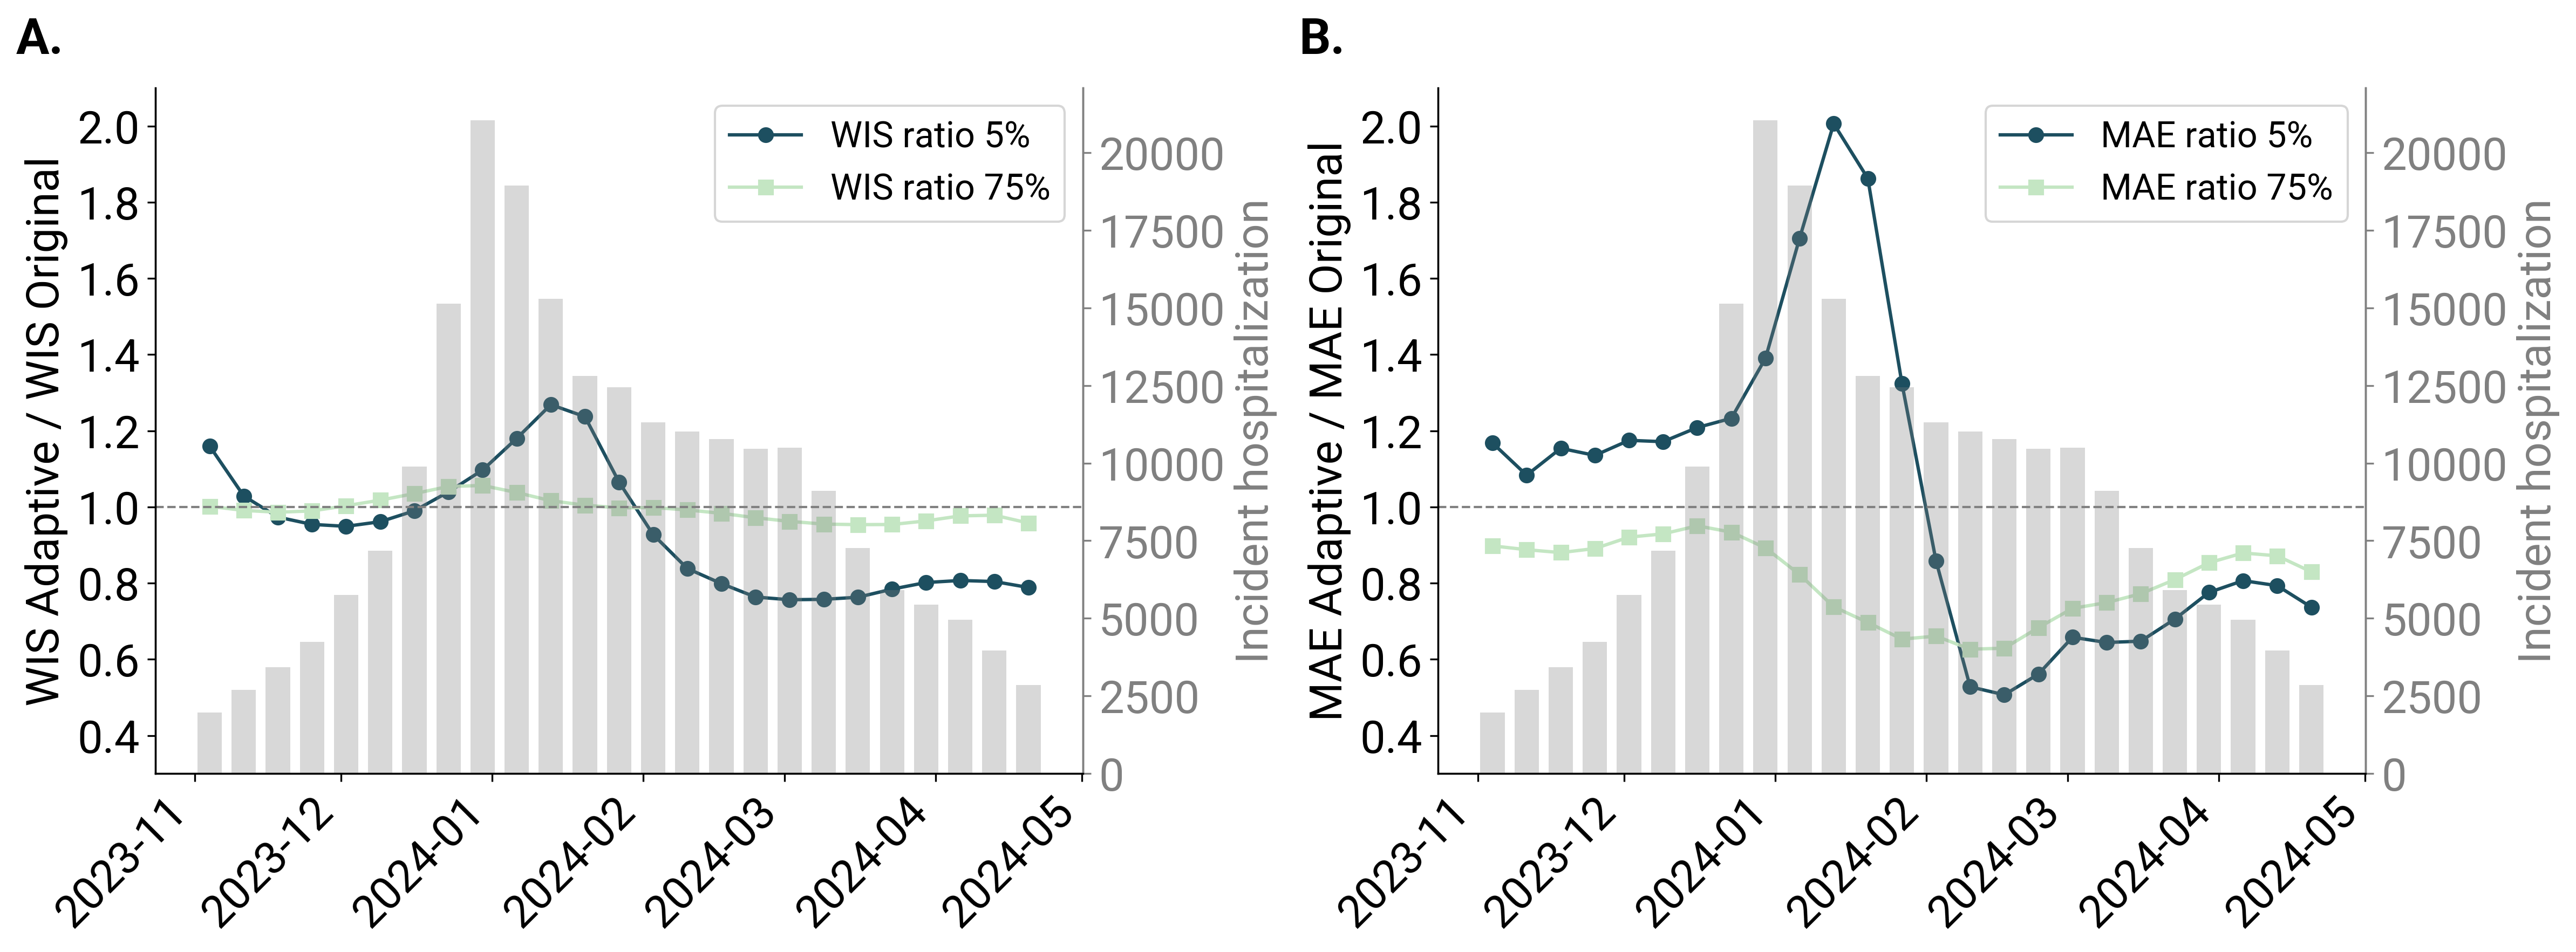

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), dpi=300)

# --- FIRST SUBPLOT: WIS Time Series ---
ax1 = axes[0]
ax2 = ax1.twinx()
ax1.plot(df_wis_k_5.week, df_wis_k_5.wis_rel_original2, 'o-', color=palette['5'], label='WIS ratio 5%')
ax1.plot(df_wis_k_75.week, df_wis_k_75.wis_rel_original2, 's-', color=palette['75'], label='WIS ratio 75%')
ax2.bar(df_wis_k_25.week, df_wis_k_25.hospitalizations, color=color_hosp, alpha=0.3, width=5)
ax1.axhline(y=1, color=color_hosp, linestyle='--', linewidth=1)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.1f}'))
ax1.set_xlabel('', fontsize=16)
ax1.set_ylabel('WIS Adaptive / WIS Original', fontproperties = font_prop)
ax2.set_ylabel('Incident hospitalization', color=color_hosp,fontproperties = font_prop)
ax1.legend(prop= font_prop_legend)
ax1.set_ylim(y_lim[0], y_lim[1])
ax1.text(-0.15, 1.05, 'A.', transform=ax1.transAxes, fontproperties = font_prop_title)
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_color(color_hosp)
#ax1.tick_params(axis='y', labelsize=14)
#ax1.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=14, colors=color_hosp)
sns.despine(ax=ax1, right=False)

# --- SUBPLOT D: MAE Time Series ---
ax3 = axes[1]
ax4 = ax3.twinx()
ax3.plot(df_mae_k_5.week, df_mae_k_5.mae_rel_original2, 'o-', color=palette['5'], label='MAE ratio 5%')
ax3.plot(df_mae_k_75.week, df_mae_k_75.mae_rel_original2, 's-', color=palette['75'], label='MAE ratio 75%')
ax4.bar(df_mae_k_25.week, df_mae_k_25.hospitalizations, color=color_hosp, alpha=0.3, width=5)
ax3.axhline(y=1, color=color_hosp, linestyle='--', linewidth=1)
ax3.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.1f}'))
ax3.set_xlabel('', fontsize=16)
ax3.set_ylabel('MAE Adaptive / MAE Original', fontproperties = font_prop)
ax4.set_ylabel('Incident hospitalization', color=color_hosp, fontproperties = font_prop)
ax3.set_ylim(y_lim[0], y_lim[1])
ax3.text(-0.15, 1.05, 'B.', transform=ax3.transAxes, fontproperties = font_prop_title)
ax3.spines['top'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_color(color_hosp)
ax4.tick_params(axis='y', colors=color_hosp)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, horizontalalignment='right')
for ax in [ax1, ax2, ax3, ax4]:
    for label in ax.get_yticklabels() + ax.get_yticklabels() + ax.get_xticklabels():
        label.set_fontproperties(font_prop)
sns.despine(ax=ax3, right=False)
ax3.legend(prop= font_prop_legend)
plt.tight_layout()
plt.savefig('../figures/wis_mae_time_k5_k75_supplementary.png', dpi=300)
plt.show()

Plotting performance of adaptive ensemble against single original ensemble

In [27]:
cols_rel_wis = ['wis_rel_originalB', 'wis_rel_originalD', 'wis_rel_originalF', 'wis_rel_original2']
cols_rel_mae = ['mae_rel_originalB', 'mae_rel_originalD', 'mae_rel_originalF', 'mae_rel_original2']
df_melted_mae = df_mae.melt(id_vars='k_perc', value_vars=cols_rel_mae, 
                              var_name='metric', value_name='value')
df_melted_wis = df_wis.melt(id_vars='k_perc', value_vars=cols_rel_wis, 
                              var_name='metric', value_name='value')
metrics_mapping_mae = {'mae_rel_originalB': 'Original B', 'mae_rel_originalD': 'Original D', 'mae_rel_originalF': 'Original F', 'mae_rel_original2': r'Original Ensemble$^2$'}
metrics_mapping_wis = {'wis_rel_originalB': 'Original B', 'wis_rel_originalD': 'Original D', 'wis_rel_originalF': 'Original F', 'wis_rel_original2': r'Original Ensemble$^2$'}
df_melted_mae['metric'] = df_melted_mae['metric'].map(metrics_mapping_mae)
df_melted_wis['metric'] = df_melted_wis['metric'].map(metrics_mapping_wis)

In [28]:
color_map = {
    'Original B': '#f6d2a9',
    'Original D':  '#ea8171',
    'Original F': '#cc607d',
    r'Original Ensemble$^2$': '#63a6a0',
}
palette_swarm = {'Original B': '#fec56b',
                 'Original D':  '#e7665b',
                 'Original F': '#70284a',
                 r'Original Ensemble$^2$': '#0d585f'}

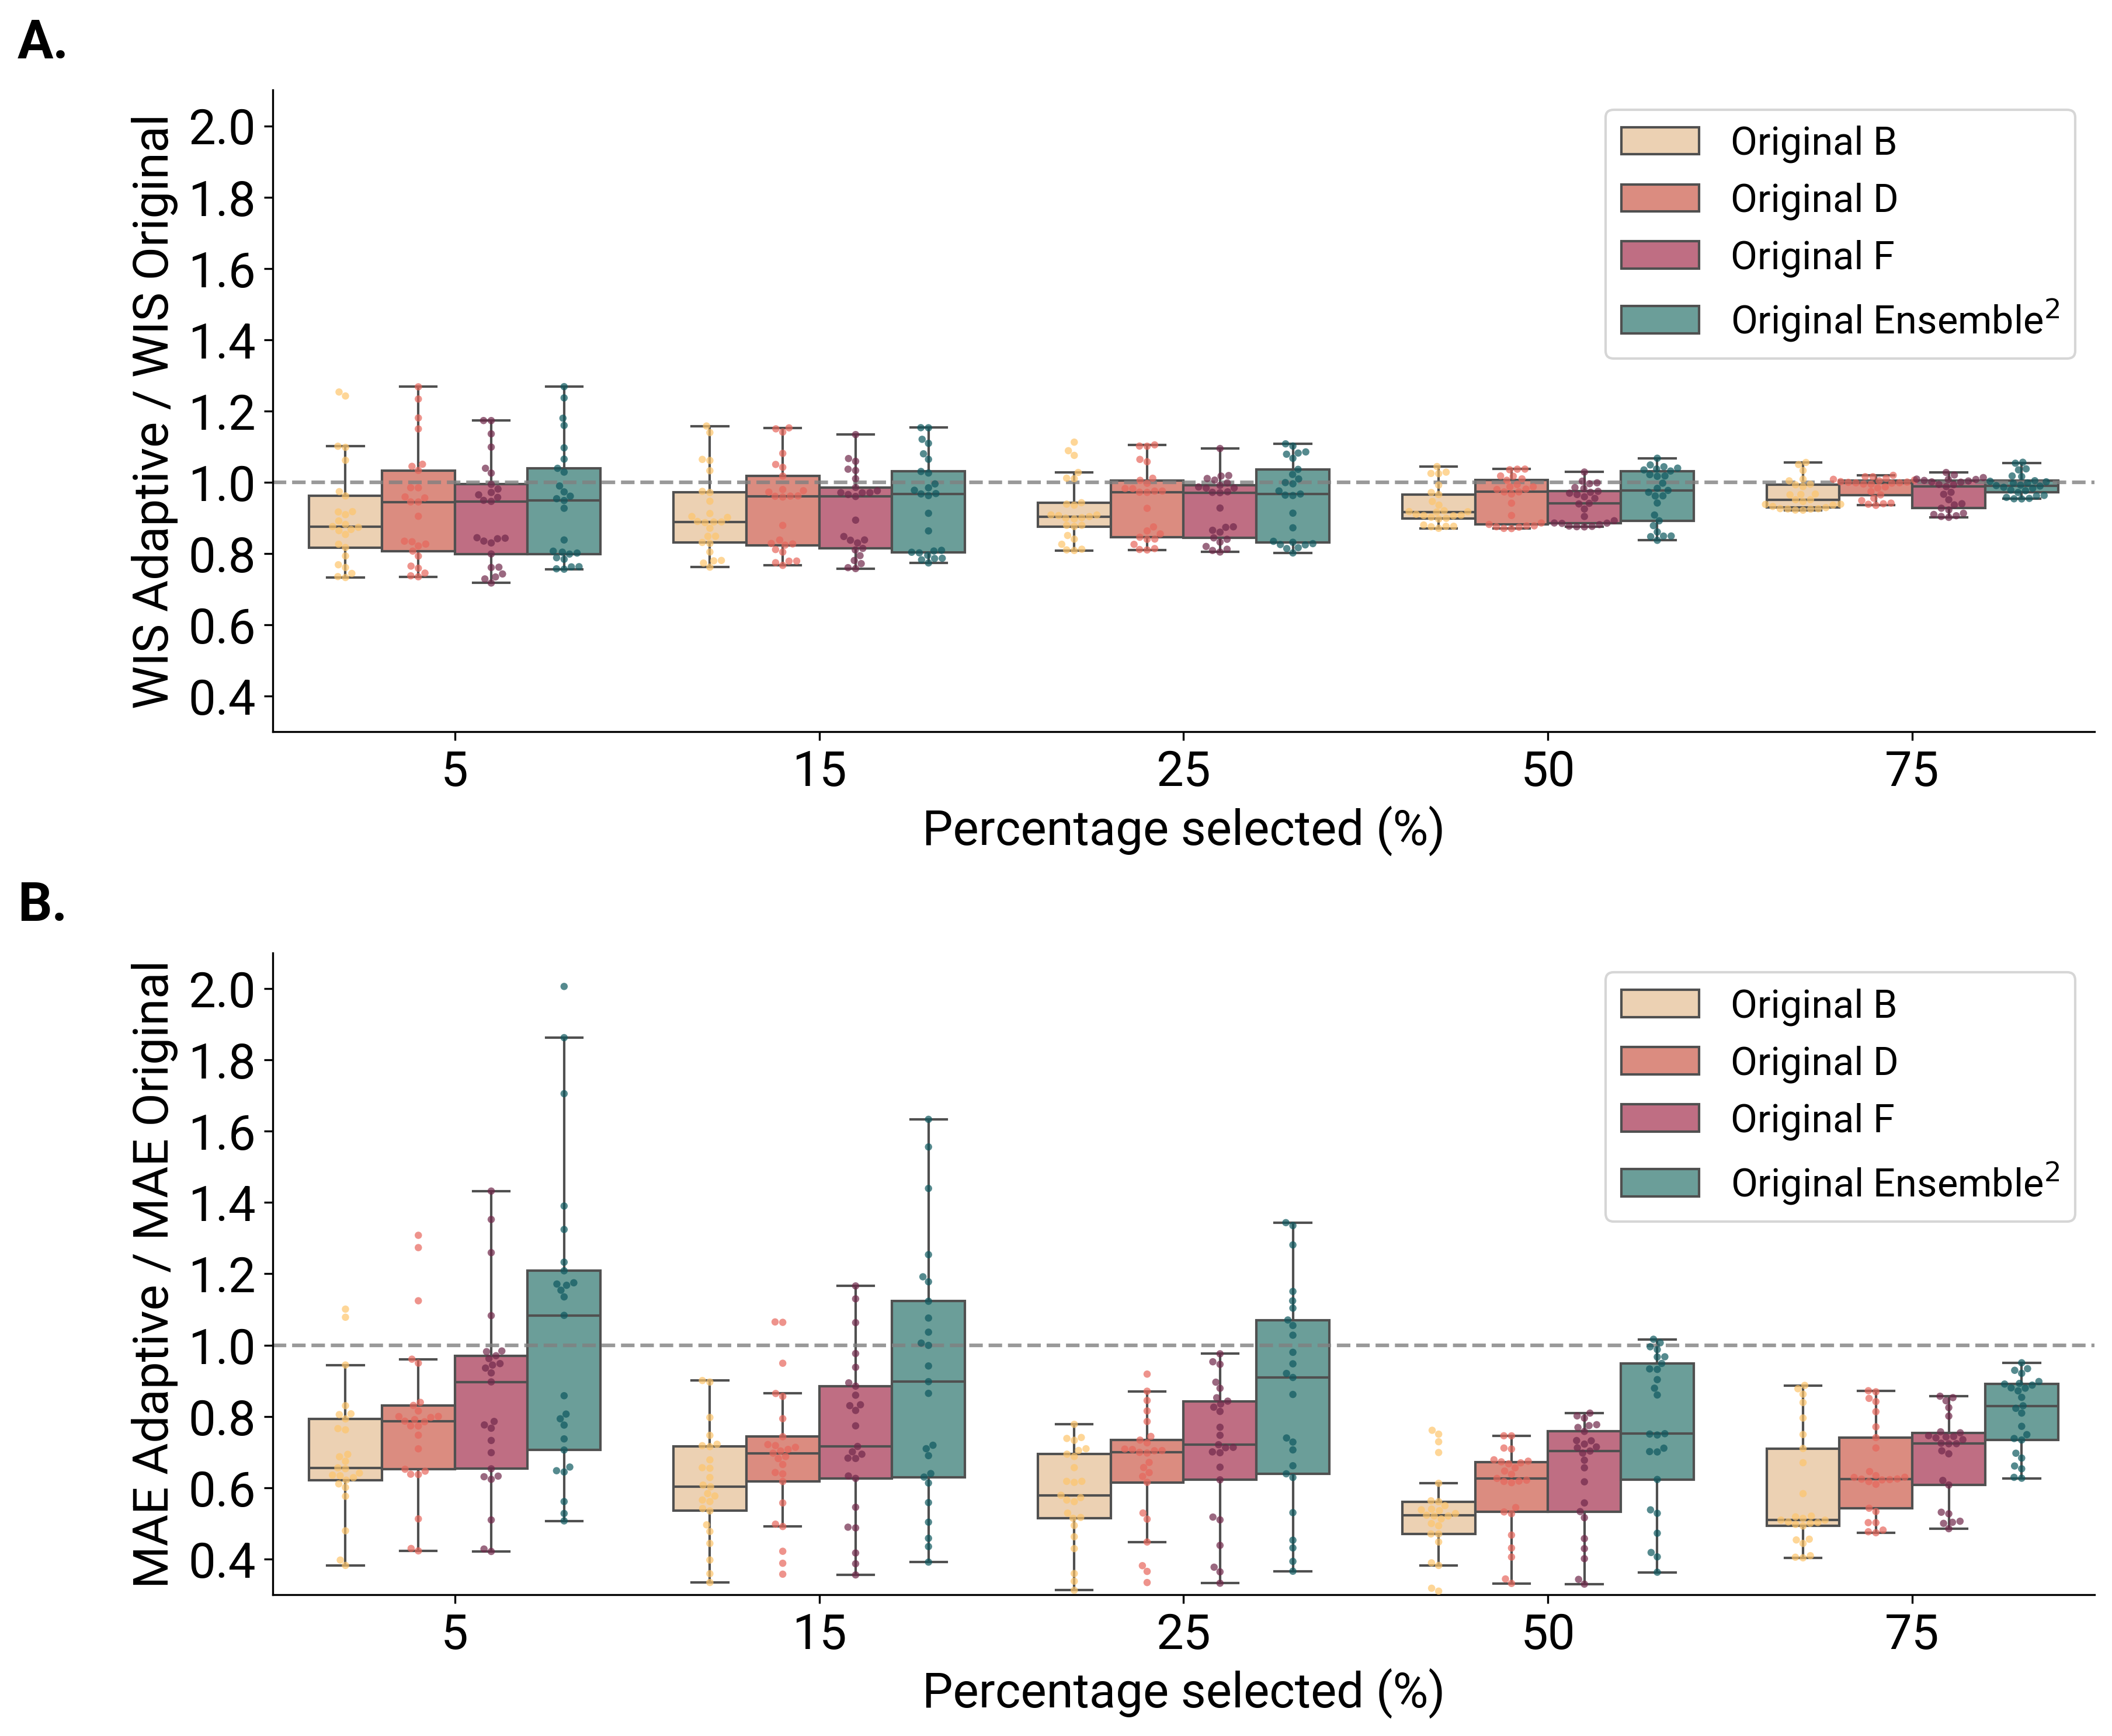

In [31]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10), dpi=300)

# --- PRIMO SUBPLOT: MAE ---
ax2 = axes[1]
sns.boxplot(data=df_melted_mae, x='k_perc', y='value', hue='metric', palette=color_map, showfliers=False, ax=ax2)
ax2.axhline(1, color=color_hosp, linestyle='--', alpha=0.8)
sns.swarmplot(data=df_melted_mae, x='k_perc', y='value', hue='metric', palette=palette_swarm, size=3, alpha=0.7, dodge=True, ax=ax2)
ax2.set_xlabel('Percentage selected (%)', fontproperties = font_prop)
ax2.set_ylabel('MAE Adaptive / MAE Original', fontproperties = font_prop)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax2.text(-0.14, 1.05, 'B.', transform=ax2.transAxes,  fontproperties = font_prop_title)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# --- SECONDO SUBPLOT: WIS ---
ax1 = axes[0]
sns.boxplot(data=df_melted_wis, x='k_perc', y='value', hue='metric', palette=color_map, showfliers=False, ax=ax1)
ax1.axhline(1, color=color_hosp, linestyle='--', alpha=0.8)
sns.swarmplot(data=df_melted_wis, x='k_perc', y='value', hue='metric', palette=palette_swarm, size=3, alpha=0.7, dodge=True, ax=ax1)
ax1.set_xlabel('Percentage selected (%)', fontproperties = font_prop)
ax1.set_ylabel('WIS Adaptive / WIS Original', fontproperties = font_prop)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax1.text(-0.14, 1.05, 'A.', transform=ax1.transAxes, fontproperties = font_prop_title)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles, labels=list(color_map.keys()), loc="upper right", prop = font_prop_legend)
ax2.legend(handles=handles, labels=list(color_map.keys()), loc="upper right", prop = font_prop_legend)
ax1.set_ylim(y_lim[0], y_lim[1])
ax2.set_ylim(y_lim[0], y_lim[1])
for ax in [ax1, ax2]:
    for label in ax.get_yticklabels() + ax.get_xticklabels():
        label.set_fontproperties(font_prop)
plt.tight_layout()

# Salva la figura
plt.savefig('../figures/wis_mae_single_scenarios_supplementary.png', dpi=300)

# Mostra la figura
plt.show()

Data format for plotting boxplots in RMSE loss function case

In [34]:
# -------- WIS --------
df_melted_wis_rmse = df_wis_rmse.melt(id_vars=['k_perc', 'week'], value_vars=['wis_rel_original2'], 
                    var_name='metric', value_name='value')
df_melted_wis_rmse['k_perc'] = df_melted_wis_rmse['k_perc'].astype(str)
means_wis_rmse = df_melted_wis_rmse.groupby('k_perc')['value'].mean()
# -------- MAE --------
df_melted_mae_rmse = df_mae_rmse.melt(id_vars=['k_perc', 'week'], value_vars=['mae_rel_original2'],
                    var_name='metric', value_name='value')
df_melted_mae_rmse['k_perc'] = df_melted_mae_rmse['k_perc'].astype(str)
means_mae_rmse = df_melted_mae_rmse.groupby('k_perc')['value'].mean()

In [35]:
palette_rmse = {'5': '#541f3f',
                '15': '#95455a',
                '25': '#c1766f',
                '50': '#daaf91',
                '75': '#ede5cf'}
color_swarm_rmse = '#380f28'

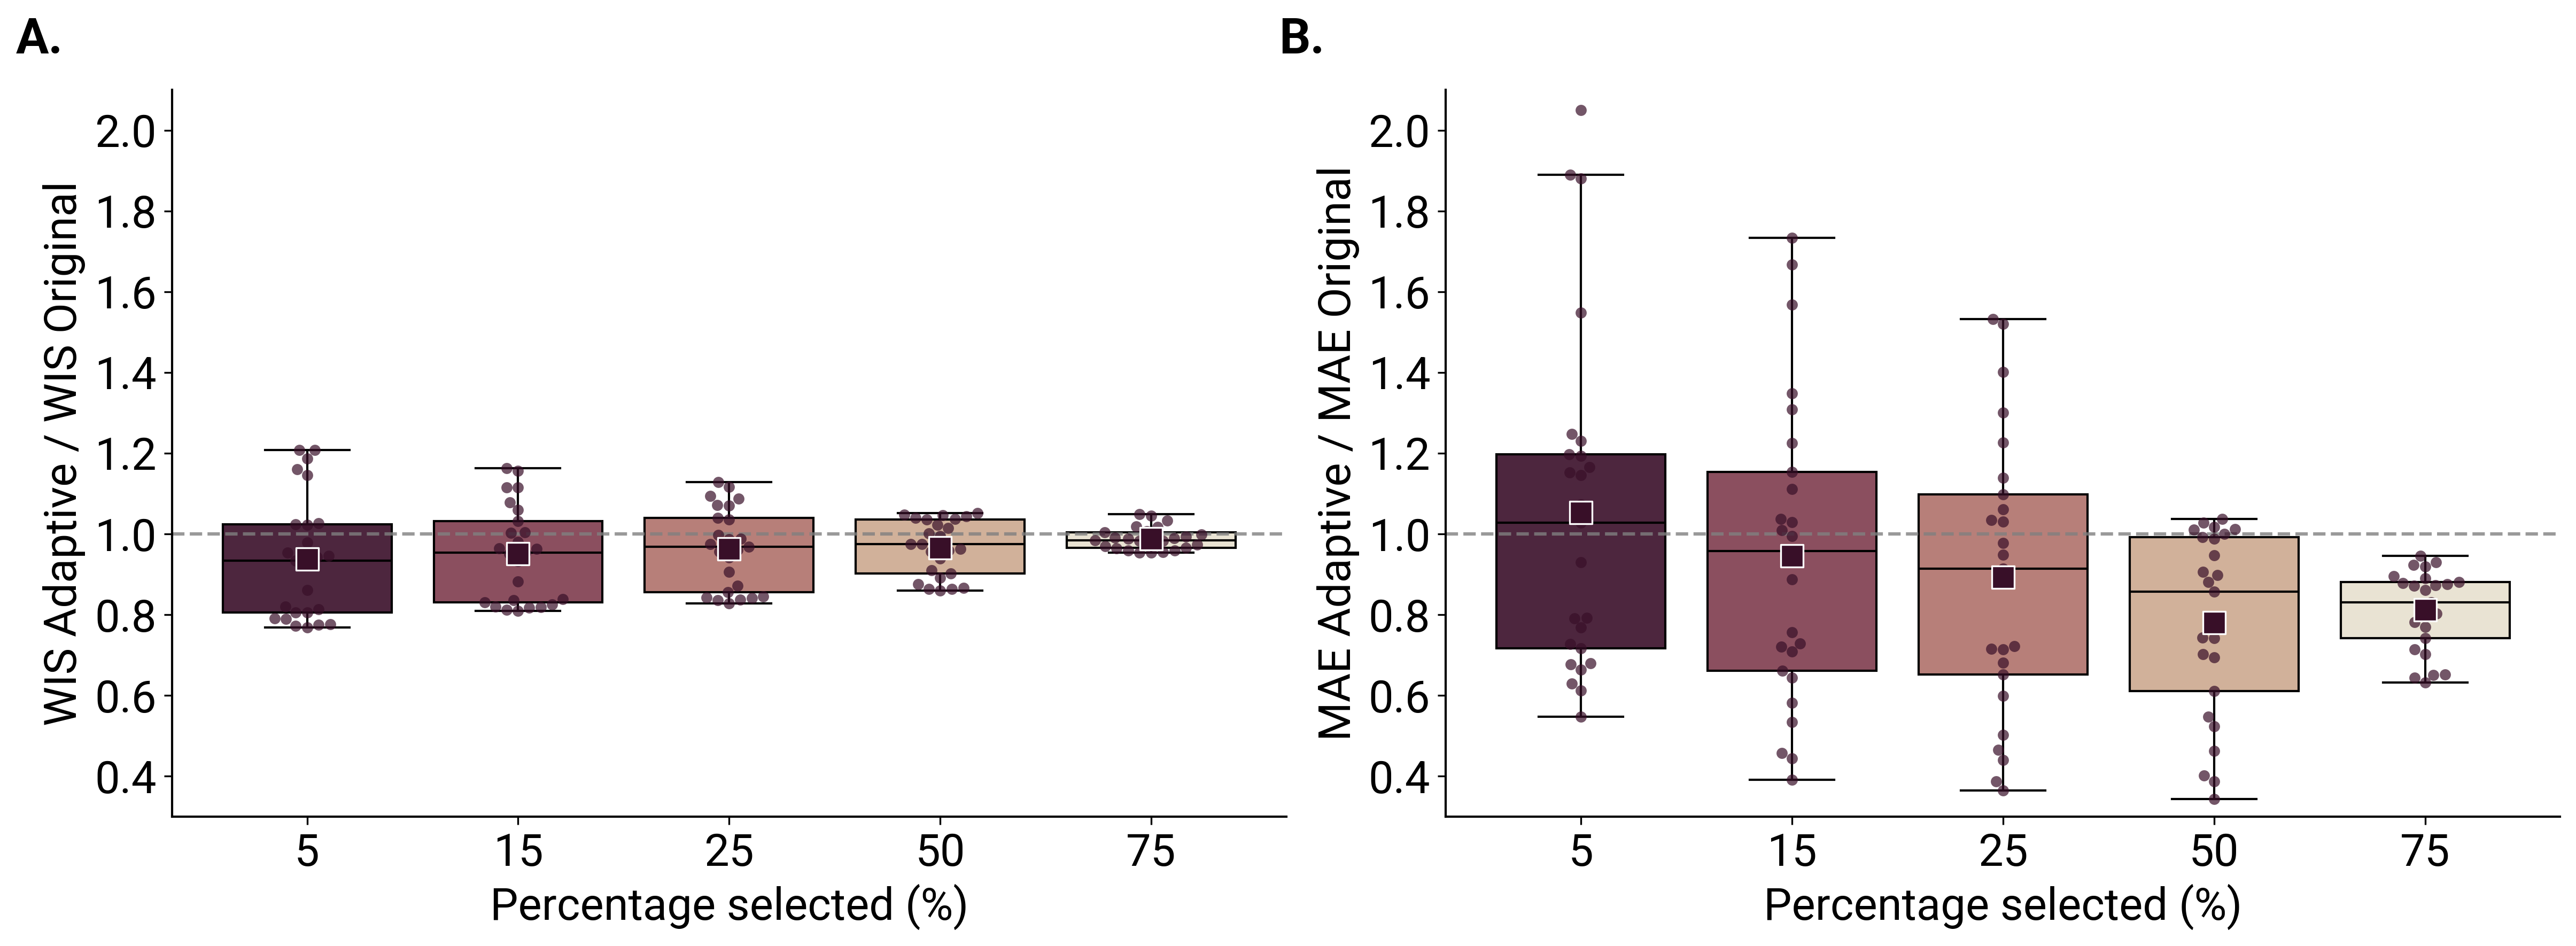

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6),dpi=300)
# --- FIRST SUBPLOT: WIS ---
ax1 = axes[0]
sns.boxplot(data=df_melted_wis_rmse, x='k_perc', y='value', ax=ax1, palette=palette_rmse, showfliers=False,
            boxprops=dict(edgecolor='black', linewidth=1.0),
            whiskerprops=dict(color='black', linewidth=1.0),
            capprops=dict(color='black', linewidth=1.0),
            medianprops=dict(color='black', linewidth=1.0))
sns.swarmplot(data=df_melted_wis_rmse, x='k_perc', y='value', ax=ax1, color=color_swarm_rmse, size=5, alpha=0.7)
sns.scatterplot(x=means_wis_rmse.index, y=means_wis_rmse.values, ax=ax1, color=color_swarm_rmse,
                marker='s', s=100, zorder=5)
ax1.axhline(1, color=color_hosp, linestyle='--', alpha=0.8)
ax1.set_xlabel('Percentage selected (%)', fontproperties=font_prop)
ax1.set_ylabel('WIS Adaptive / WIS Original', fontproperties=font_prop)
ax1.text(-0.14, 1.05, 'A.', transform=ax1.transAxes, fontproperties=font_prop_title)
sns.despine(ax=ax1)
# --- SECOND SUBPLOT: MAE ---
ax2 = axes[1]
sns.boxplot(data=df_melted_mae_rmse, x='k_perc', y='value', ax=ax2, palette=palette_rmse, showfliers=False,
            boxprops=dict(edgecolor='black', linewidth=1.0),
            whiskerprops=dict(color='black', linewidth=1.0),
            capprops=dict(color='black', linewidth=1.0),
            medianprops=dict(color='black', linewidth=1.0))
sns.swarmplot(data=df_melted_mae_rmse, x='k_perc', y='value', ax=ax2, color=color_swarm_rmse, size=5, alpha=0.7)
sns.scatterplot(x=means_mae_rmse.index, y=means_mae_rmse.values, ax=ax2, color=color_swarm_rmse,
                marker='s', s=100, zorder=5)
ax2.axhline(1, color=color_hosp, linestyle='--', alpha=0.8)
ax2.set_xlabel('Percentage selected (%)', fontproperties=font_prop)
ax2.set_ylabel('MAE Adaptive / MAE Original', fontproperties=font_prop)
ax2.text(-0.15, 1.05, 'B.', transform=ax2.transAxes, fontproperties=font_prop_title)
ax1.set_ylim(y_lim[0], y_lim[1])
ax2.set_ylim(y_lim[0], y_lim[1])
sns.despine(ax=ax2)
for ax in axes:
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['bottom'].set_linewidth(1.0)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(font_prop)
plt.tight_layout()
plt.savefig('../figures/wis_mae_rmse_supplementary.png', dpi=300)
plt.show()